# Preparation

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# Data Preview
data = pd.read_excel(
    "Data Analisis Statistik-2023-kualitas air-raw.xlsx", index_col=0)

# We don't need these '>BM xx' data because we don't have information about what these indicators really mean
# Also, for skill demonstration purpose, I will remove the 'Kode' and 'Jenis Air' columns first.
data = data.drop(['Nomor sampel', 'Kode', 'Jenis Air', '>BM Cd',
                 '>bm Hg', '>BM Mn', '>BM Pb', '>BM Zn', '>BM Fe'], axis=1)
data

Sampel ID      As      Cd      Co      Cr      Cu      Fe      Hg  \
No                                                                        
1      MJ-AS-01  0.0062  0.0001  0.0026  0.0069  0.0100  1.6585  0.0001   
2      MJ-AS-03  0.0212  0.0006  0.0001  0.0070  0.0077  3.7910  0.0001   
3      MJ-AS-04  0.0065  0.0001  0.0001  0.0062  0.0073  0.0820  0.0001   
4      MJ-AS-05  0.0162  0.0006  0.0001  0.0084  0.0094  1.4833  0.0001   
5     MJ-AS-05B  0.0194  0.0001  0.0001  0.0086  0.0098  2.3356  0.0001   
..          ...     ...     ...     ...     ...     ...     ...     ...   
156  SR-ASAM-08  0.0164  0.0001  0.0001  0.0059  0.0024  0.3552  0.0001   
157  SR-ASAM-14  0.0196  0.0019  0.0171  0.0053  0.0125  0.1067  0.0001   
158  SR-ASAM-20  0.0062  0.0001  0.0085  0.0076  0.0089  0.0684  0.0001   
159  SR-ASAM-21  0.0070  0.0001  0.0015  0.0072  0.0033  0.0547  0.0050   
160  SR-ASAM-22  0.0110  0.0001  0.0002  0.0054  0.0021  0.0826  0.0001   

         Mn      Pb      Zn  
No                           
1    0.3428  0.0001  0.1079  
2    0.4119  0.0119  0.0309  
3    0.2206  0.0186  0.0521  
4    0.4985  0.0001  0.0886  
5    0.1716  0.0196  0.0641  
..      ...     ...     ...  
156  0.0012  0.0001  0.0739  
157  0.7120  0.0495  0.8312  
158  1.1956  0.0235  0.0755  
159  0.1624  0.0001  0.0606  
160  0.0058  0.0001  0.8351  

[160 rows x 11 columns]

## Extract Code and Water Type

In [3]:
# split the ID value, then get the first string for the region and second string for the type
data['Region'] = data['Sampel ID'].str.split('-').str[0]
data['Type'] = data['Sampel ID'].str.split('-').str[1]

In [4]:
data['Type'].unique()

array(['AS', 'ASAM', '08', '11', '12', '13', 'ASAM‐19'], dtype=object)

The 'type' column should only consists of AS or ASAM. As you can see, there's another value present in this data. Let's figure out which rows contains these errors.

In [5]:
data[~data['Sampel ID'].str.split('-').str[1].isin(['AS', 'ASAM'])]

Sampel ID      As      Cd      Co      Cr      Cu      Fe      Hg  \
No                                                                       
52    CP-08-AS  0.0155  0.0010  0.0001  0.0128  0.0113  6.2391  0.0001   
53  CP-11-ASAM  0.0190  0.0009  0.0001  0.0172  0.0106  0.2971  0.0001   
54    CP-12-AS  0.0134  0.0001  0.0008  0.0186  0.0119  0.2941  0.0001   
55    CP-13-AS  0.0133  0.0010  0.0016  0.0296  0.0138  3.1102  0.0001   
70  CP-ASAM‐19  0.0023  0.0010  0.0001  0.0135  0.0311  0.1585  0.0001   

        Mn      Pb      Zn Region     Type  
No                                          
52  0.6119  0.0142  0.1370     CP       08  
53  0.0250  0.0151  0.1104     CP       11  
54  0.2472  0.0049  0.1761     CP       12  
55  0.4770  0.0055  0.1123     CP       13  
70  0.0893  0.0001  0.2647     CP  ASAM‐19

Looks like there are only 5 rows that are problematic. Let's just fix them manually.

In [6]:
data.loc[[52, 54, 55], 'Type'] = 'AS'
data.loc[[53, 70], 'Type'] = 'ASAM'

Let's change if those rows already been changed.

In [7]:
data[~data['Sampel ID'].str.split('-').str[1].isin(['AS', 'ASAM'])]

Sampel ID      As      Cd      Co      Cr      Cu      Fe      Hg  \
No                                                                       
52    CP-08-AS  0.0155  0.0010  0.0001  0.0128  0.0113  6.2391  0.0001   
53  CP-11-ASAM  0.0190  0.0009  0.0001  0.0172  0.0106  0.2971  0.0001   
54    CP-12-AS  0.0134  0.0001  0.0008  0.0186  0.0119  0.2941  0.0001   
55    CP-13-AS  0.0133  0.0010  0.0016  0.0296  0.0138  3.1102  0.0001   
70  CP-ASAM‐19  0.0023  0.0010  0.0001  0.0135  0.0311  0.1585  0.0001   

        Mn      Pb      Zn Region  Type  
No                                       
52  0.6119  0.0142  0.1370     CP    AS  
53  0.0250  0.0151  0.1104     CP  ASAM  
54  0.2472  0.0049  0.1761     CP    AS  
55  0.4770  0.0055  0.1123     CP    AS  
70  0.0893  0.0001  0.2647     CP  ASAM

# EDA

In [8]:
data['Region'].value_counts()

MJ    27
RC    25
CP    24
BL    24
SR    22
PC    20
PL    18
Name: Region, dtype: int64

## Proportion Visualization

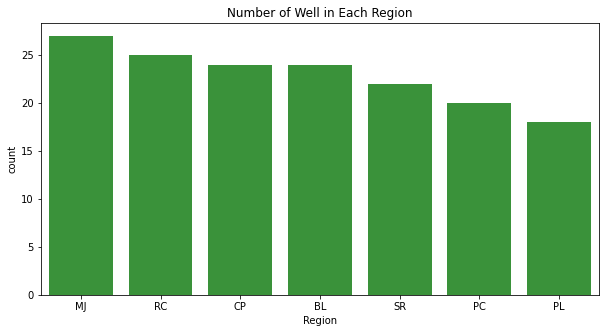

In [9]:
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x='Region', order=data['Region'].value_counts().index, color="tab:green")
plt.title("Number of Well in Each Region")
plt.show()

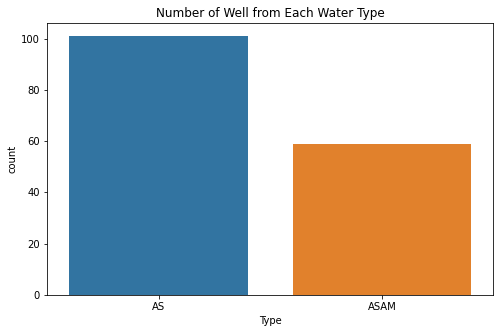

In [10]:
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='Type')
plt.title("Number of Well from Each Water Type")
plt.show()

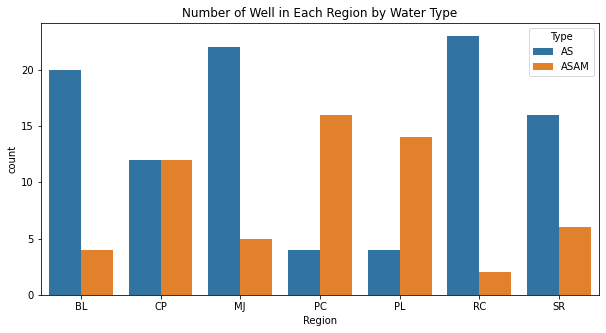

In [11]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Region',
              data=data,
              order=['BL', 'CP', 'MJ', 'PC', 'PL', 'RC', 'SR'],
              hue='Type')
plt.title("Number of Well in Each Region by Water Type")
plt.show()

# Distribution dan Correlation Visualization

**Catatan** <br>
**- Loading dapat memakan waktu** <br>
**- Double click untuk zoom in**

<Figure size 1440x1440 with 0 Axes>

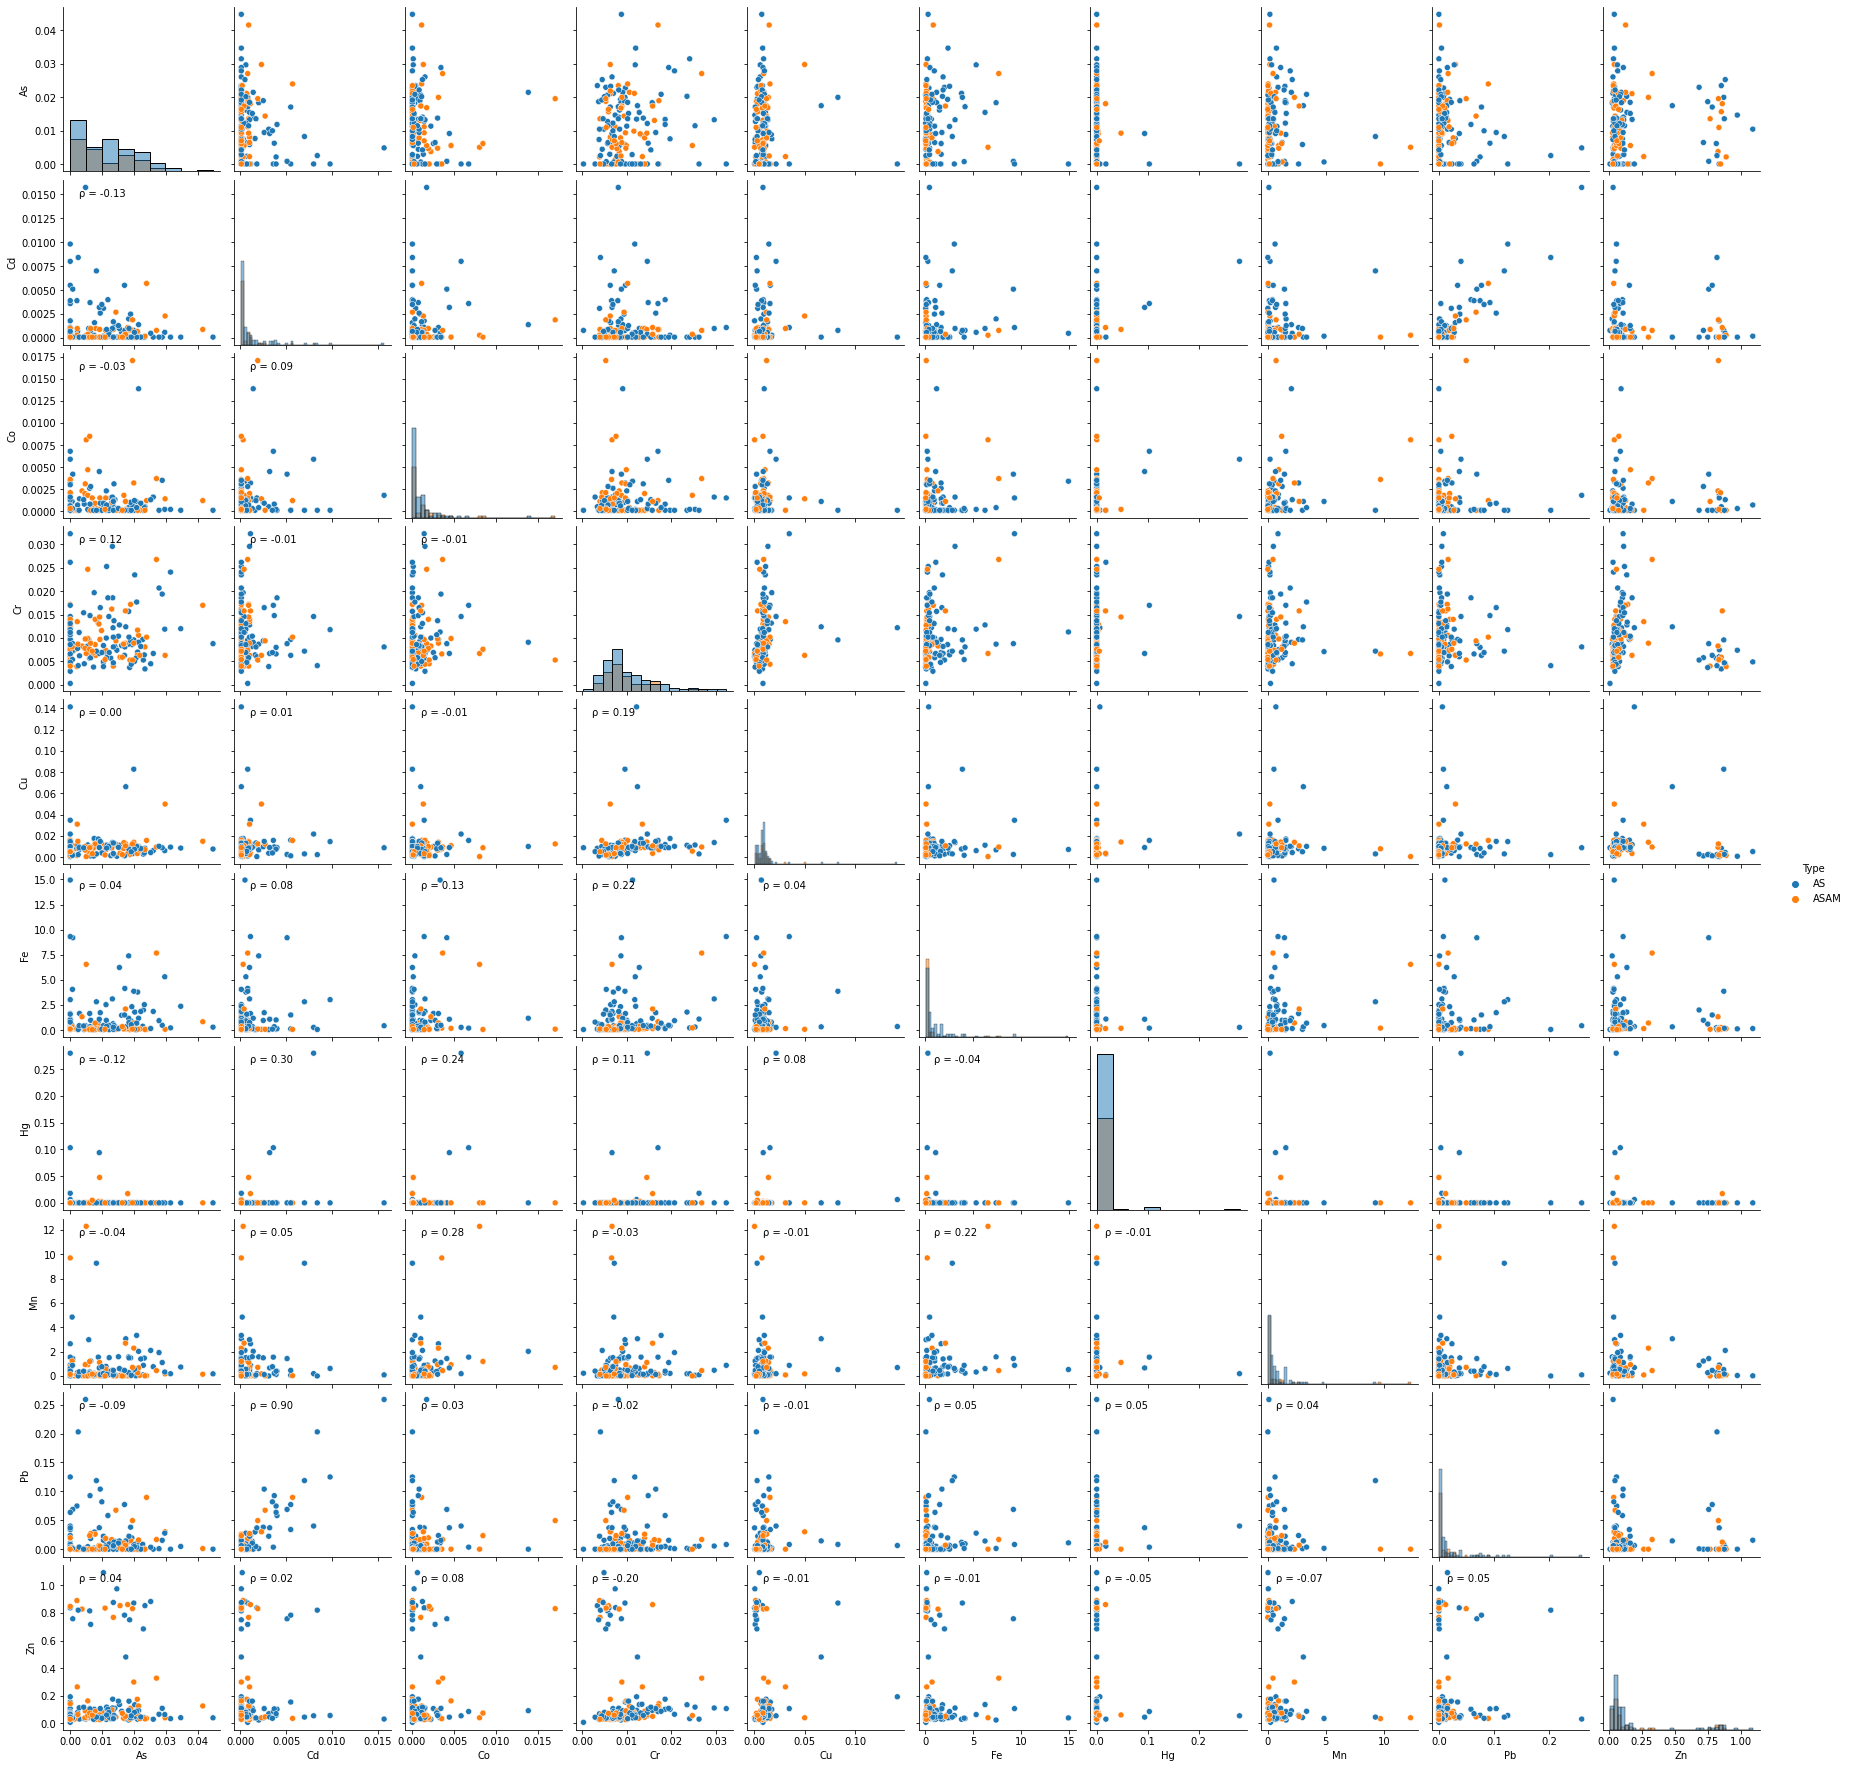

In [12]:
from scipy.stats import pearsonr

def corrfunc(x, y, ax=None, hue=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    ax.annotate(f'ρ = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)

plt.figure(figsize=(20, 20))
g = sns.pairplot(data=data, hue='Type', diag_kind='hist')
g.map_lower(corrfunc)
plt.show()

<Figure size 1440x1440 with 0 Axes>

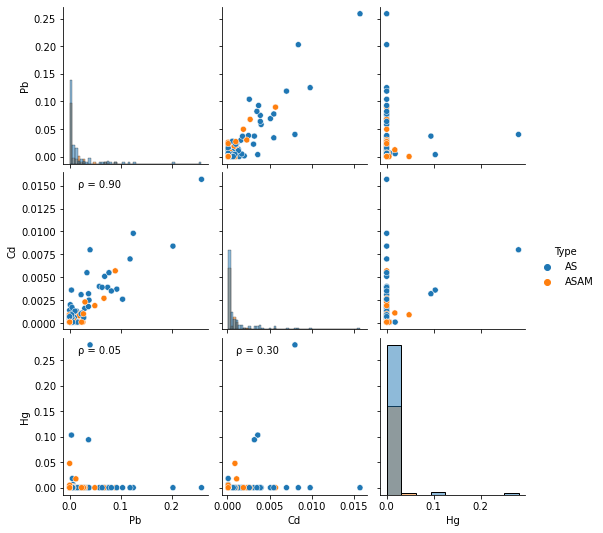

In [13]:
from scipy.stats import pearsonr

def corrfunc(x, y, ax=None, hue=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    ax.annotate(f'ρ = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)

plt.figure(figsize=(20, 20))
g = sns.pairplot(data=data[['Pb', 'Cd', 'Hg', 'Type']], hue='Type', diag_kind='hist')
g.map_lower(corrfunc)
plt.show()

## Mean of Substances Concentration in Each Region

### Full Data

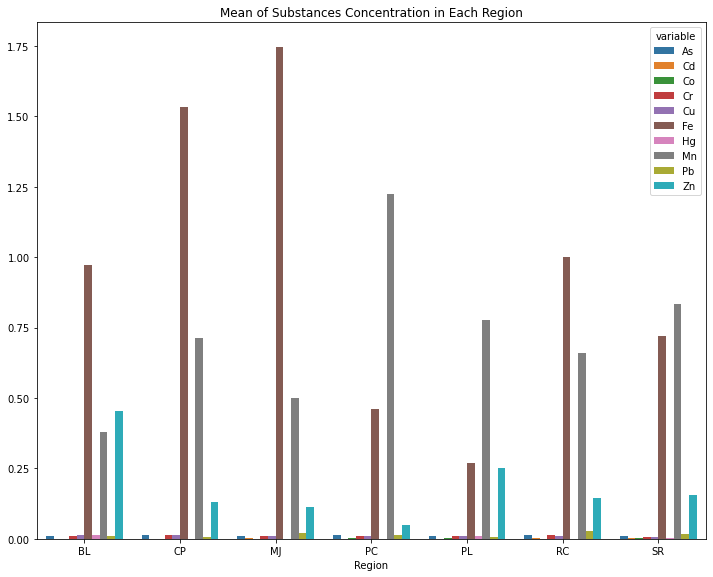

In [14]:
data_gp = data.groupby(['Region']).agg('mean')
res = data_gp.reset_index()
res_wide = res.melt(id_vars="Region")

plt.figure(figsize=(12, 9.5))
sns.barplot(x="Region", y="value", data=res_wide, hue='variable')
plt.title('Mean of Substances Concentration in Each Region')
plt.ylabel('')
plt.show()

### AS Only Data

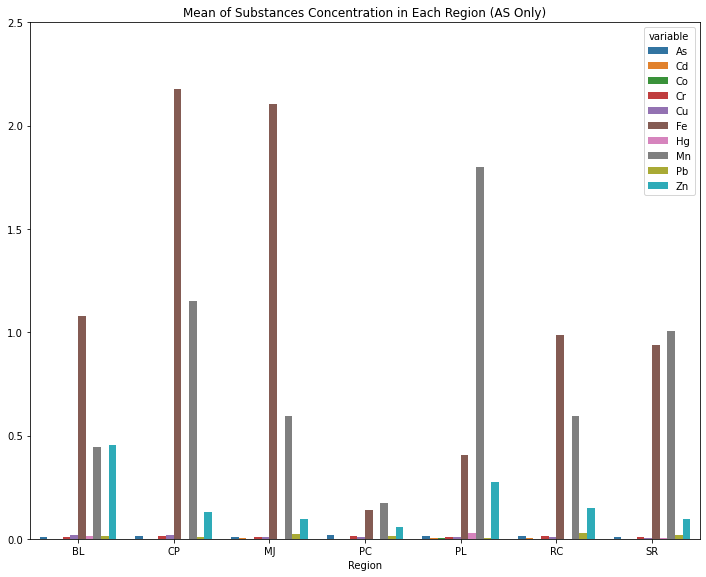

In [15]:
data_gp = data[data['Type'] == 'AS'].groupby(['Region']).agg('mean')
res = data_gp.reset_index()
res_wide=res.melt(id_vars="Region")

plt.figure(figsize=(12,9.5))
sns.barplot(x="Region", y="value",data=res_wide, hue='variable')
plt.title('Mean of Substances Concentration in Each Region (AS Only)')
plt.ylabel('')
plt.ylim(0, 2.5)
plt.show()

### ASAM Only Data

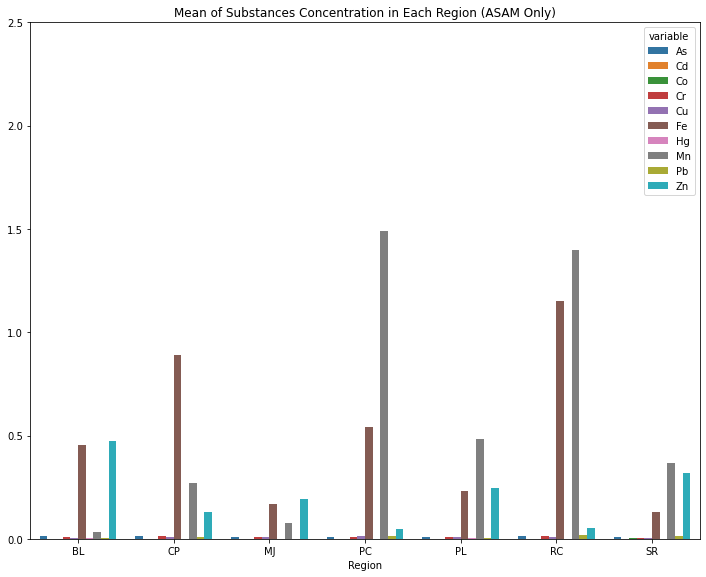

In [16]:
data_gp = data[data['Type'] == 'ASAM'].groupby(['Region']).agg('mean')
res = data_gp.reset_index()
res_wide=res.melt(id_vars="Region")

plt.figure(figsize=(12,9.5))
sns.barplot(x="Region", y="value",data=res_wide, hue='variable')
plt.title('Mean of Substances Concentration in Each Region (ASAM Only)')
plt.ylabel('')
plt.ylim(0, 2.5)
plt.show()

# Clustering

In [17]:
from scipy.cluster.hierarchy import dendrogram, linkage

## Aggregation

In [18]:
agg_mean = data.groupby('Region').agg('mean')
agg_mean

As        Cd        Co        Cr        Cu        Fe        Hg  \
Region                                                                         
BL      0.011117  0.001004  0.001029  0.008858  0.014692  0.973554  0.013504   
CP      0.012358  0.000517  0.000937  0.014554  0.013850  1.534404  0.000308   
MJ      0.008978  0.001396  0.000778  0.008219  0.008593  1.746515  0.000100   
PC      0.012085  0.000790  0.001235  0.009540  0.011375  0.461930  0.000100   
PL      0.009483  0.000633  0.002061  0.009728  0.009356  0.269589  0.008478   
RC      0.013460  0.001476  0.000780  0.011820  0.009332  0.999200  0.000100   
SR      0.009836  0.001145  0.001818  0.006677  0.005350  0.718868  0.004595   

              Mn        Pb        Zn  
Region                                
BL      0.377721  0.009838  0.455558  
CP      0.711413  0.007667  0.130892  
MJ      0.500022  0.019404  0.112393  
PC      1.225370  0.013360  0.048860  
PL      0.775944  0.005300  0.252650  
RC      0.658616  0.029140  0.143132  
SR      0.833150  0.018445  0.156645

## Dendrogram

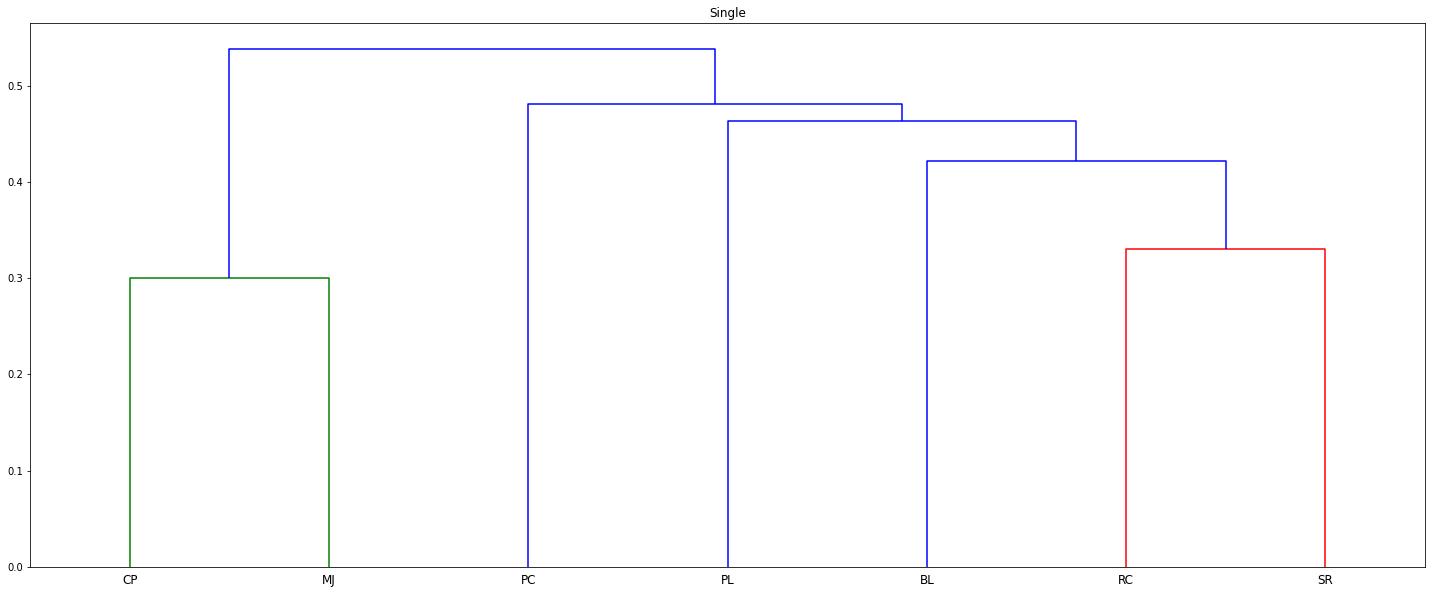

In [19]:
agg_mean = data.groupby('Region').agg('mean')
Z = linkage(agg_mean, 'single')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z, labels=agg_mean.index)
plt.title('Single')
plt.show()

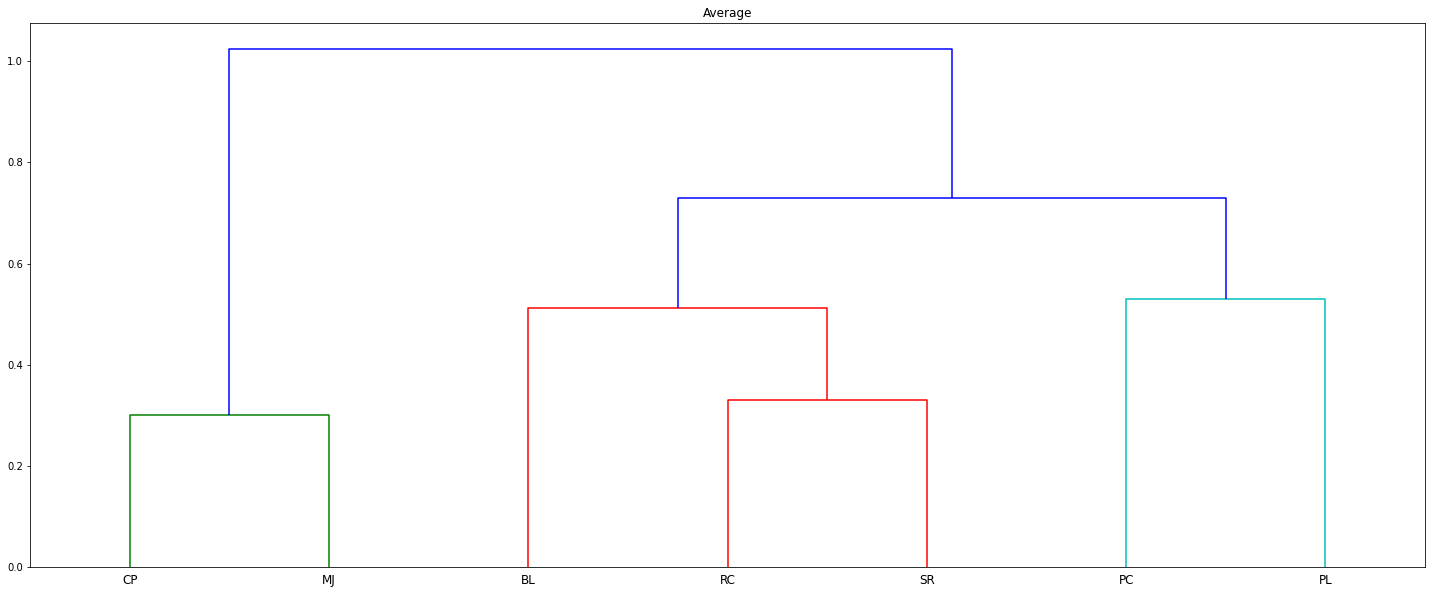

In [20]:
Z = linkage(agg_mean, 'average')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z, labels=agg_mean.index)
plt.title('Average')
plt.show()

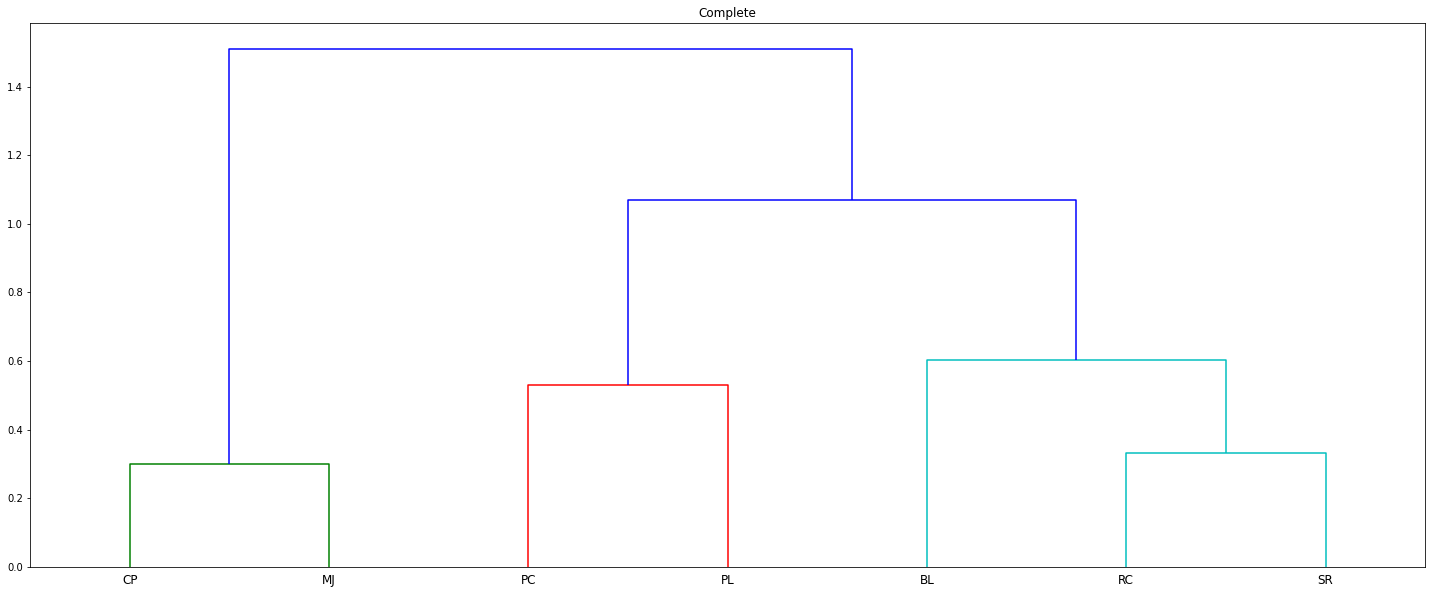

In [21]:
Z = linkage(agg_mean, 'complete')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z, labels=agg_mean.index)
plt.title('Complete')
plt.show()

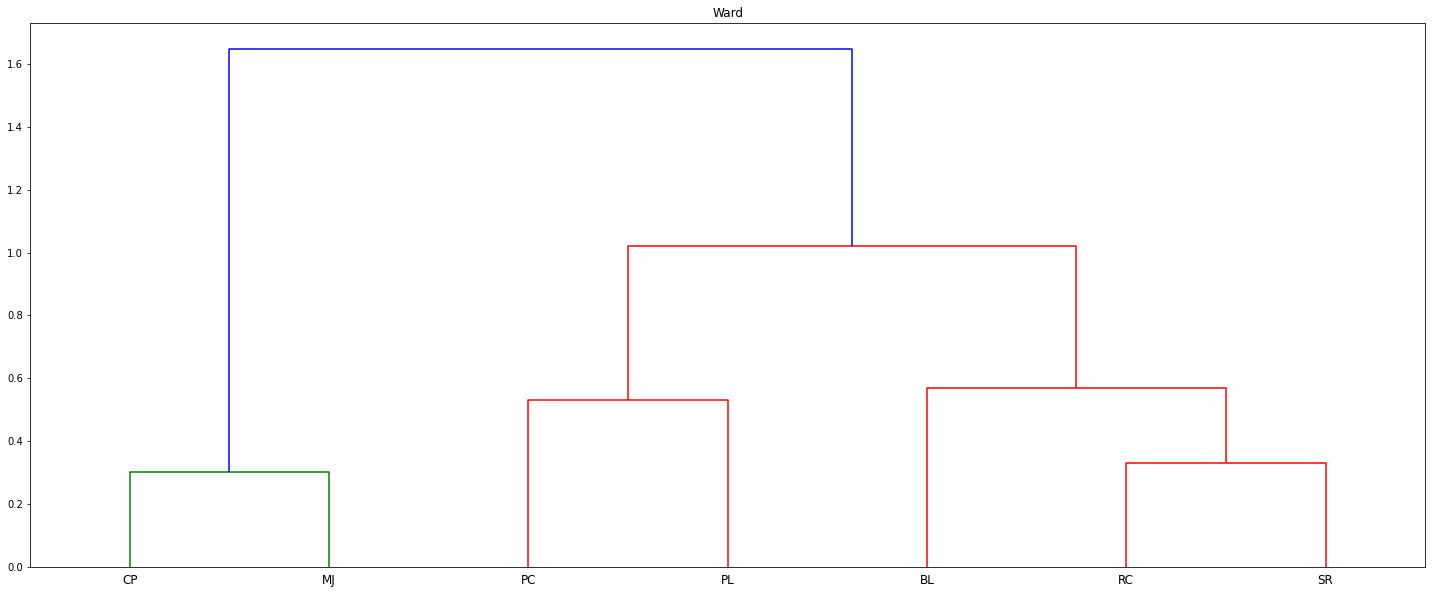

In [22]:
Z = linkage(agg_mean, 'ward')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z, labels=agg_mean.index)
plt.title('Ward')
plt.show()

## Create Cluster Column

In [23]:
cluster_raw_single = {"CP|MJ":1, "PC":2, "PL|BL|RC|SR":3}
data['Single'] = data['Region'].replace(cluster_raw_single, regex=True)

cluster_raw_avg = {"CP|MJ":1, "BL|RC|SR":2, "PC|PL":3}
data['Others'] = data['Region'].replace(cluster_raw_avg, regex=True)

# Assign Longitude and Latitude

In [24]:
replacer_long = {"MJ": 107.746994, "BL": 107.631878, "RC": 107.759404, "SR": 107.532008, "PL": 107.566423, "PC": 107.698135, "CP": 107.710501}
replacer_lat = {"MJ": -7.054680, "BL": -7.004517, "RC": -6.971517, "SR": -7.025404, "PL": -7.195907, "PC": -7.119608, "CP": -7.037803}
data['longitude'] = data['Region'].replace(replacer_long).astype(float)
data['latitude'] = data['Region'].replace(replacer_lat).astype(float)

# Full Data

In [25]:
data

Sampel ID      As      Cd      Co      Cr      Cu      Fe      Hg  \
No                                                                        
1      MJ-AS-01  0.0062  0.0001  0.0026  0.0069  0.0100  1.6585  0.0001   
2      MJ-AS-03  0.0212  0.0006  0.0001  0.0070  0.0077  3.7910  0.0001   
3      MJ-AS-04  0.0065  0.0001  0.0001  0.0062  0.0073  0.0820  0.0001   
4      MJ-AS-05  0.0162  0.0006  0.0001  0.0084  0.0094  1.4833  0.0001   
5     MJ-AS-05B  0.0194  0.0001  0.0001  0.0086  0.0098  2.3356  0.0001   
..          ...     ...     ...     ...     ...     ...     ...     ...   
156  SR-ASAM-08  0.0164  0.0001  0.0001  0.0059  0.0024  0.3552  0.0001   
157  SR-ASAM-14  0.0196  0.0019  0.0171  0.0053  0.0125  0.1067  0.0001   
158  SR-ASAM-20  0.0062  0.0001  0.0085  0.0076  0.0089  0.0684  0.0001   
159  SR-ASAM-21  0.0070  0.0001  0.0015  0.0072  0.0033  0.0547  0.0050   
160  SR-ASAM-22  0.0110  0.0001  0.0002  0.0054  0.0021  0.0826  0.0001   

         Mn      Pb      Zn Region  Type  Single  Others   longitude  latitude  
No                                                                              
1    0.3428  0.0001  0.1079     MJ    AS       1       1  107.746994 -7.054680  
2    0.4119  0.0119  0.0309     MJ    AS       1       1  107.746994 -7.054680  
3    0.2206  0.0186  0.0521     MJ    AS       1       1  107.746994 -7.054680  
4    0.4985  0.0001  0.0886     MJ    AS       1       1  107.746994 -7.054680  
5    0.1716  0.0196  0.0641     MJ    AS       1       1  107.746994 -7.054680  
..      ...     ...     ...    ...   ...     ...     ...         ...       ...  
156  0.0012  0.0001  0.0739     SR  ASAM       3       2  107.532008 -7.025404  
157  0.7120  0.0495  0.8312     SR  ASAM       3       2  107.532008 -7.025404  
158  1.1956  0.0235  0.0755     SR  ASAM       3       2  107.532008 -7.025404  
159  0.1624  0.0001  0.0606     SR  ASAM       3       2  107.532008 -7.025404  
160  0.0058  0.0001  0.8351     SR  ASAM       3       2  107.532008 -7.025404  

[160 rows x 17 columns]

# Plot According to Geographical Data

In [26]:
import plotly.express as px
import plotly.graph_objects as go

# To menginstall:
# !pip install plotly

In [27]:
color_scale = [(0, 'red'), (1,'green')]
data_agg = data.groupby(['Region']).agg('mean')

fig = px.scatter_mapbox(data_agg, 
                        lat="latitude", 
                        lon="longitude", 
                        color="Single",
                        zoom=8,
                        height=500,
                        width=500,
                        text = list(data_agg.index))

fig.update_layout(mapbox_style="carto-positron")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.update_traces(marker={'size': 15})
fig.update_traces(textposition='top center')
fig.show()

In [28]:
color_scale = [(0, 'orange'), (1,'red')]

fig = px.scatter_mapbox(data_agg, 
                        lat="latitude", 
                        lon="longitude", 
                        color='Others',
                        hover_data={'index': (data_agg.index)},
                        zoom=8,
                        height=500,
                        width=500)

fig.update_layout(mapbox_style="carto-positron")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.update_traces(marker={'size': 15})
fig.show()